In [11]:
# package for data manipulation
import pandas as pd
import numpy as np
# pkg for data vis
import seaborn as sns
import matplotlib.pyplot as plt
# package for data processsing
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample
# package for data modelling
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

data = pd.read_csv ('C:/Users/hninmo/Documents/Datasets/tiktok_dataset.csv')
data.head()
data.shape
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [12]:
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [13]:
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [15]:
data = data.dropna(axis = 0).reset_index(drop=True)
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [16]:
data.duplicated().sum()

np.int64(0)

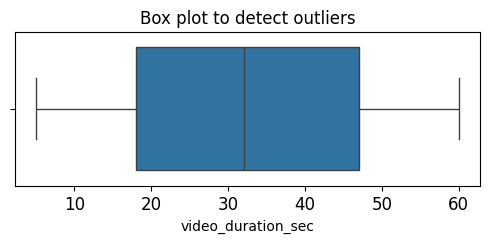

In [24]:
plt.figure(figsize=(6,2))
plt.title ('Box plot to detect outliers', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=data['video_duration_sec'])
plt.show()

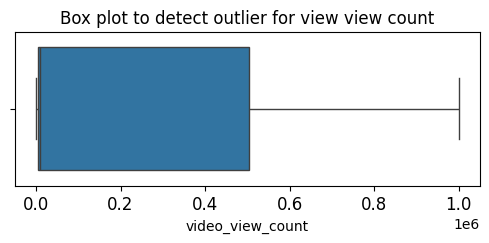

In [ ]:
plt.figure(figsize=(6,2))
plt.title ('Box plot to detect outlier for Video view count', fontsize = 12)
plt.xticks(fontsize=12)
plt.yticks(fontsize =12)
sns.boxplot(x=data['video_view_count'])
plt.show()

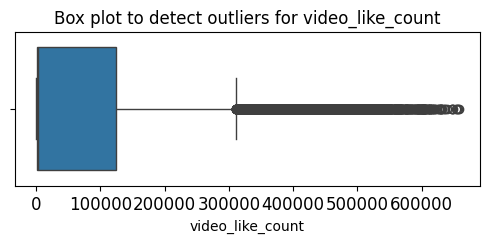

In [25]:
plt.figure(figsize=(6,2))
plt.title('Box plot to detect outliers for video_like_count')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=data['video_like_count'])
plt.show()

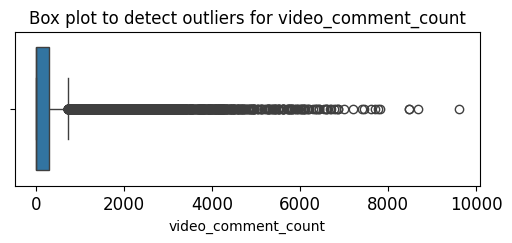

In [26]:
plt.figure(figsize=(6,2))
plt.title('Box plot to detect outliers for video_comment_count')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=data['video_comment_count'])
plt.show()

In [27]:
data['verified_status'].value_counts()

verified_status
not verified    17884
verified         1200
Name: count, dtype: int64

The majoirty of the data set represents the video posted by unverified accounts so the outcome vairable is not very balanced. we should use resampling ot create class balance. 

In [28]:
# Use resampling to create class balance in the outcome variable.
data_minority = data[data['verified_status'] == 'verified']
data_majority = data[data['verified_status'] == 'not verified']

data_minority_upsampled = resample(data_minority,
                                   replace=True,                    #to sample with replacement
                                   n_samples=len(data_majority),    # to match majority class
                                    random_state=0)                 # to create reproducible results

data_upsampled = pd.concat([data_majority,data_minority_upsampled]).reset_index(drop=True)
data_upsampled['verified_status'].value_counts()

verified_status
not verified    17884
verified        17884
Name: count, dtype: int64

In [29]:
data_upsampled[['verified_status','video_transcription_text']].groupby(by='verified_status')[['video_transcription_text']].agg(func=lambda array: np.mean([len(text) for text in array]))

,video_transcription_text
verified_status,
not verified,89.401141
verified,84.569559


In [30]:
data_upsampled['text_length'] = data_upsampled['video_transcription_text'].apply(func = lambda text: len(text))

In [31]:
data_upsampled.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


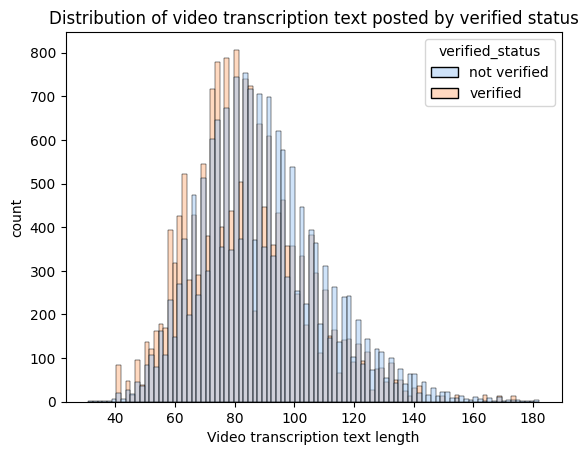

In [34]:
sns.histplot(data=data_upsampled, stat='count',x='text_length',kde=False, palette='pastel',
             hue='verified_status',element='bars', legend=True)
plt.xlabel ('Video transcription text length')
plt.ylabel ('count')
plt.title ('Distribution of video transcription text posted by verified status')
plt.show()

In [35]:
data_upsampled.corr(numeric_only=True)

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
#,1.000000,-0.000853,-0.011729,-0.697007,-0.581483,-0.504015,-0.487096,-0.413799,-0.193677
video_id,-0.000853,1.000000,0.011859,0.002554,0.006507,0.010515,0.008753,0.013983,-0.007083
video_duration_sec,-0.011729,0.011859,1.000000,0.013589,0.004890,0.002206,0.003989,-0.004586,-0.002981
video_view_count,-0.697007,0.002554,0.013589,1.000000,0.832832,0.711313,0.690048,0.583485,0.244693
video_like_count,-0.581483,0.006507,0.004890,0.832832,1.000000,0.850053,0.828082,0.706140,0.202386
video_share_count,-0.504015,0.010515,0.002206,0.711313,0.850053,1.000000,0.710117,0.620182,0.171651
video_download_count,-0.487096,0.008753,0.003989,0.690048,0.828082,0.710117,1.000000,0.857679,0.173396
video_comment_count,-0.413799,0.013983,-0.004586,0.583485,0.706140,0.620182,0.857679,1.000000,0.149750
text_length,-0.193677,-0.007083,-0.002981,0.244693,0.202386,0.171651,0.173396,0.149750,1.000000


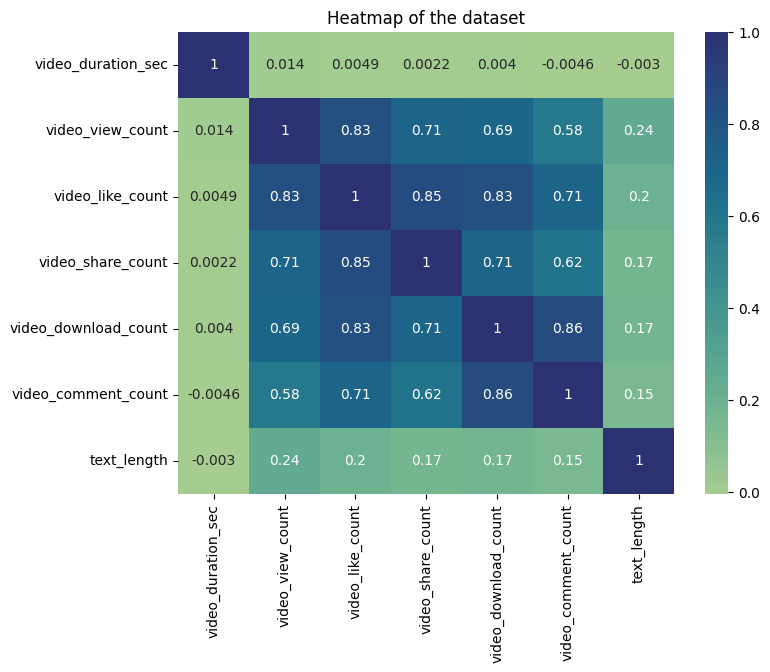

In [40]:
plt.figure(figsize=(8,6))
sns.heatmap(
    data_upsampled[['video_duration_sec','video_view_count','video_like_count','video_share_count','video_download_count','video_comment_count','text_length']]
    .corr (numeric_only=True),
    annot=True,
    cmap='crest')
plt.title('Heatmap of the dataset')
plt.show()

The data show video download count and video comment count are strong correlated (0.86 cor coefficient). To meet one of the model assumption of logistic regresion, video comment count will be excluded. 

CONSTRUCT


In [46]:
y = data_upsampled['verified_status']
X = data_upsampled [['video_download_count','video_duration_sec','video_view_count','video_like_count','video_share_count','claim_status','author_ban_status']]

X.head()

,video_download_count,video_duration_sec,video_view_count,video_like_count,video_share_count,claim_status,author_ban_status
0,1.0,59,343296.0,19425.0,241.0,claim,under review
1,1161.0,32,140877.0,77355.0,19034.0,claim,active
2,833.0,31,902185.0,97690.0,2858.0,claim,active
3,1234.0,25,437506.0,239954.0,34812.0,claim,active
4,547.0,19,56167.0,34987.0,4110.0,claim,active


In [47]:
# split the data into train and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

In [48]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26826, 7), (8942, 7), (26826,), (8942,))

The number of features (7) aligns between the training and testing sets.
The number of rows aligns between the features and the outcome variable for training (26826) and testing (8942).

In [49]:
# Encode variables
X_train.dtypes

video_download_count    float64
video_duration_sec        int64
video_view_count        float64
video_like_count        float64
video_share_count       float64
claim_status             object
author_ban_status        object
dtype: object

In [51]:
X_train['claim_status'].unique()

array(['opinion', 'claim'], dtype=object)

In [52]:
X_train['author_ban_status'].unique()

array(['active', 'under review', 'banned'], dtype=object)

As shown above, the claim_status and author_ban_status features are each of data type object currently. In order to work with the implementations of models through sklearn, these categorical features will need to be made numeric. One way to do this is through one-hot encoding.

In [53]:
X_train_to_encode = X_train[['claim_status','author_ban_status']]
X_train_to_encode.head()

,claim_status,author_ban_status
33058,opinion,active
20491,opinion,active
25583,opinion,active
18474,opinion,active
27312,opinion,active


In [54]:
X_encoder = OneHotEncoder(drop='first', sparse_output=False)

In [55]:
X_train_encoded = X_encoder.fit_transform(X_train_to_encode)

In [56]:
X_encoder.get_feature_names_out()

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [57]:
X_train_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], shape=(26826, 3))

In [58]:
X_train_encoded_df = pd.DataFrame(data=X_train_encoded, columns=X_encoder.get_feature_names_out())
X_train_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [60]:
X_train.drop(columns=['claim_status','author_ban_status']).head()


,video_download_count,video_duration_sec,video_view_count,video_like_count,video_share_count
33058,4.0,33,2252.0,829.0,23.0
20491,53.0,52,6664.0,2135.0,550.0
25583,3.0,37,6327.0,734.0,257.0
18474,0.0,57,1702.0,96.0,28.0
27312,1.0,21,3842.0,279.0,101.0


In [61]:
X_train_final= pd.concat([X_train.drop(columns=['claim_status','author_ban_status']).reset_index(drop=True),X_train_encoded_df], axis=1)
X_train_final.head()

,video_download_count,video_duration_sec,video_view_count,video_like_count,video_share_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,4.0,33,2252.0,829.0,23.0,1.0,0.0,0.0
1,53.0,52,6664.0,2135.0,550.0,1.0,0.0,0.0
2,3.0,37,6327.0,734.0,257.0,1.0,0.0,0.0
3,0.0,57,1702.0,96.0,28.0,1.0,0.0,0.0
4,1.0,21,3842.0,279.0,101.0,1.0,0.0,0.0


In [62]:
y_train.dtypes

dtype('O')

In [64]:
y_train.unique()

array(['verified', 'not verified'], dtype=object)

In [66]:
y_encoder = OneHotEncoder(drop='first', sparse_output=False)
y_train_final = y_encoder.fit_transform(y_train.values.reshape(-1,1)).ravel()

y_train_final

array([1., 1., 1., ..., 1., 1., 0.], shape=(26826,))

In [67]:
# Model Building (construct a model and fit it to the training set)
log_clf = LogisticRegression(random_state=0,max_iter=800).fit(X_train_final, y_train_final)

In [69]:
# Model Evaluation
X_test_to_encode = X_test[['claim_status','author_ban_status']]
X_test_to_encode.head()

,claim_status,author_ban_status
21061,opinion,active
31748,opinion,active
20197,claim,active
5727,claim,active
11607,opinion,active


In [70]:
X_test_encoded = X_encoder.transform(X_test_to_encode)
X_test_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], shape=(8942, 3))

In [71]:
X_test_encoded_df = pd.DataFrame(data=X_test_encoded,columns=X_encoder.get_feature_names_out())
X_test_encoded_df

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
8937,1.0,0.0,0.0
8938,1.0,0.0,0.0
8939,1.0,0.0,0.0
8940,0.0,0.0,1.0


In [72]:
X_test.drop(columns=['author_ban_status','claim_status']).head()

,video_download_count,video_duration_sec,video_view_count,video_like_count,video_share_count
21061,5.0,41,2118.0,465.0,57.0
31748,1.0,27,5701.0,423.0,157.0
20197,5956.0,31,449767.0,288280.0,75385.0
5727,5146.0,19,792813.0,285084.0,56597.0
11607,19.0,54,2044.0,766.0,68.0


In [75]:
X_test_final = pd.concat([X_test.drop(columns=['author_ban_status','claim_status']).reset_index(drop=True), X_test_encoded_df], axis=1)
X_test_final.head()

,video_download_count,video_duration_sec,video_view_count,video_like_count,video_share_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,5.0,41,2118.0,465.0,57.0,1.0,0.0,0.0
1,1.0,27,5701.0,423.0,157.0,1.0,0.0,0.0
2,5956.0,31,449767.0,288280.0,75385.0,0.0,0.0,0.0
3,5146.0,19,792813.0,285084.0,56597.0,0.0,0.0,0.0
4,19.0,54,2044.0,766.0,68.0,1.0,0.0,0.0


In [76]:
y_pred = log_clf.predict(X_test_final)
y_pred

array([1., 1., 0., ..., 1., 0., 1.], shape=(8942,))

In [77]:
y_test_final = y_encoder.transform(y_test.values.reshape(-1,1)).ravel()
y_test_final

array([1., 1., 1., ..., 0., 1., 1.], shape=(8942,))

In [78]:
X_train_final.shape, y_train_final.shape, X_test_final.shape, y_test_final.shape

((26826, 8), (26826,), (8942, 8), (8942,))

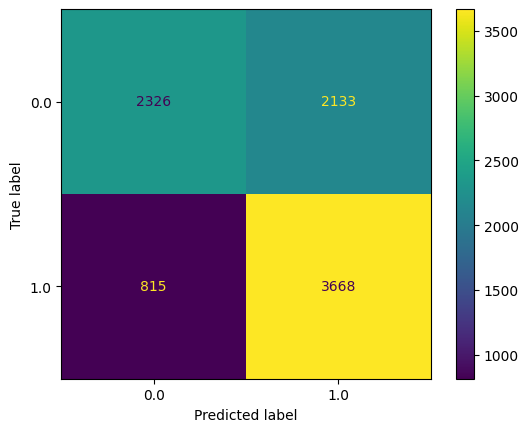

In [79]:
# Visualize model results
# Create a confusion matrix to visualize the results of the logistic regression model.

log_cm = confusion_matrix(y_test_final, y_pred, labels=log_clf.classes_)

# Create display of CM
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

# plot confusion matrix
log_disp.plot()

plt.show()

In [80]:
(3668+2326)/(2326+3668+815+2133)

0.6703198389622008

The upper-left quadrant displays the number of true negatives: the number of videos posted by unverified accounts that the model accurately classified as so.

The upper-right quadrant displays the number of false positives: the number of videos posted by unverified accounts that the model misclassified as posted by verified accounts.

The lower-left quadrant displays the number of false negatives: the number of videos posted by verified accounts that the model misclassified as posted by unverified accounts.

The lower-right quadrant displays the number of true positives: the number of videos posted by verified accounts that the model accurately classified as so.

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

In [81]:
# Create classification report for logistic regression model
target_labels = ['verified','not verified']
print(classification_report(y_test_final,y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    verified       0.74      0.52      0.61      4459
not verified       0.63      0.82      0.71      4483

    accuracy                           0.67      8942
   macro avg       0.69      0.67      0.66      8942
weighted avg       0.69      0.67      0.66      8942



In [82]:
# Interpret model coefficient

pd.DataFrame(data={'Feature Name':log_clf.feature_names_in_, 'Model Coefficient':log_clf.coef_[0]})

,Feature Name,Model Coefficient
0,video_download_count,-4.115367e-05
1,video_duration_sec,-2.505945e-03
2,video_view_count,-6.639534e-08
3,video_like_count,-3.446235e-07
4,video_share_count,5.556321e-06
5,claim_status_opinion,1.640873e+00
6,author_ban_status_banned,-4.357340e-01
7,author_ban_status_under review,-1.075838e-01


Key takeaways:

The dataset has a few strongly correlated variables, which might lead to multicollinearity issues when fitting a logistic regression model. We decided to drop video_comment_count from the model building.
Based on the logistic regression model, each additional second of the video is associated with 0.009 increase in the log-odds of the user having a verified status.
The logistic regression model had not great, but acceptable predictive power: a precision of 63% is less than ideal, but a recall of 87% is very good. Overall accuracy is towards the lower end of what would typically be considered acceptable.